In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import numpy as np

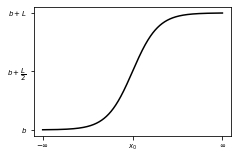

In [17]:
l=7
x=np.linspace(-l,l,1000)
y=1/(1+np.exp(-x))
mpl.rc('lines',linewidth=1.5,markersize=4)  
mpl.rc('grid',linewidth=0.5,linestyle='--')
mpl.rc('font',size=7,family='Times New Roman')
cm = 1/2.54
mpl.rc('figure',figsize=(9*cm,6*cm))
plt.plot(x,y,'k')
# plt.grid()
plt.xticks([-l,0,l],[r"$-\infty$",r"$x_0$",r"$\infty$"])
plt.yticks([0,0.5,1],[r"$b$",r"$b+\dfrac{L}{2}$",r"$b+L$"])
# plt.savefig("./logistic.pdf", bbox_inches='tight')

In [2]:
directoryPath = Path.cwd().joinpath('Outputs')
base_result=pd.read_csv(directoryPath.joinpath('base.csv'),squeeze=True,index_col=0,dtype='float64')

In [10]:
# units=pd.read_csv(directoryPath.joinpath('units.csv'),squeeze=True)
units=pd.read_csv(directoryPath.joinpath('units.csv'),squeeze=True,index_col=0)
# units

## Declare Chart Properties

In [27]:
mpl.rc('lines',linewidth=1.5,markersize=4)  
mpl.rc('grid',linewidth=0.5,linestyle='--')
mpl.rc('font',size=7,family='Times New Roman')
cm = 1/2.54
mpl.rc('figure',figsize=(9*cm,6*cm))
markerinterval=12*2**4
custom_cycler=(cycler(marker=[None,'*','d','o','x'])+cycler(color=[str(i) for i in np.linspace(0.2,0.6,5)]))
mpl.rc('axes',prop_cycle=custom_cycler)


## Craete Individual Charts

In [30]:
for v in base_result.columns:
    plt.plot(base_result[v])
    plt.grid(True)
    plt.title(v)
    plt.xlabel('Time (Month)')
    plt.xticks(range(0,250,24))
    plt.ylabel(units[v])
    plt.savefig(directoryPath.joinpath(f'{v}.pdf'),bbox_inches='tight')
    plt.clf()

<Figure size 255.118x170.079 with 0 Axes>

## Create Budget Deficit Fraction Chart

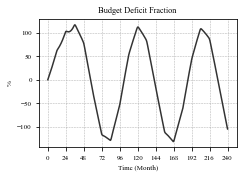

In [29]:
deficit_fraction=100*base_result['Budget Deficit']/base_result['Total Costs']
plt.plot(deficit_fraction)
plt.grid(True)
plt.title('Budget Deficit Fraction')
plt.xlabel('Time (Month)')
plt.xticks(range(0,250,24))
plt.ylabel('%')
plt.savefig(directoryPath.joinpath(f'Deficit Fraction.pdf'),bbox_inches='tight')


## Create Customers Chart

In [ ]:
customers =['Regular Consumers', 'Prosumers', 'Defectors', 'Total Consumers']
for c in customers:
    plt.plot(base_result[c],label=c,markevery=markerinterval)
plt.xticks(range(0,250,24))
plt.grid(True)
plt.legend(loc='center')
plt.title('No of Consumers Adopting Each Concept')
plt.xlabel('Time (Month)')
plt.ylabel('Consumer')
plt.savefig(directoryPath.joinpath('Customers.pdf'),facecolor='w',bbox_inches='tight')
plt.clf()

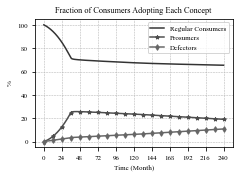

In [33]:
customers =['Regular Consumers', 'Prosumers', 'Defectors']
for c in customers:
    plt.plot(100*base_result[c]/base_result['Total Consumers'],label=c,markevery=markerinterval)
plt.xticks(range(0,250,24))
plt.grid(True)
plt.legend()
plt.title('Fraction of Consumers Adopting Each Concept')
plt.xlabel('Time (Month)')
plt.ylabel('%')
plt.savefig(directoryPath.joinpath('Customers.pdf'),facecolor='w',bbox_inches='tight')


## Compare Income and cost

Text(0, 0.5, '%')

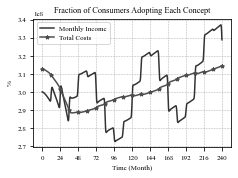

In [32]:
monthly_income = base_result['Electricity Tariff']*base_result['Utility Energy Sale']

plt.plot(monthly_income,label='Monthly Income',markevery=markerinterval)
plt.plot(1.15*base_result['Total Costs'],label='Total Costs',markevery=markerinterval)

plt.xticks(range(0,250,24))
plt.grid(True)
plt.legend()
plt.title('Fraction of Consumers Adopting Each Concept')
plt.xlabel('Time (Month)')
plt.ylabel('%')
